In [1]:
import numpy as np
import os
import joblib
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils import plot_model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from prettytable import PrettyTable

In [2]:
# Set the directory path where the text files are located
dir_path = "C:\\Users\\zergs\\Desktop\\LipReadingTool\\my_outs"

# Set the dimensions of each frame
height, width, channels = 80, 112, 3

# Initialize arrays to store the video frames and their corresponding labels
videos = []
labels = []
counter = 0
# Loop through each text file and extract the video frames
for root, dirs, files in os.walk(dir_path):
    
    for file in files:
        if file == "data.txt":

            # Extract the label from the directory name
            label = root.split("\\")[-1]
            label = label.split("_")[0]
            #if label not in wanted_words:
            #    continue
            counter += 1
            print(label," ", counter, end=" ")
            

            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Evaluate the contents of the text file as a Python expression
            data_list = eval(data_str)
            
            # Convert the list to a numpy array
            data_array = np.array(data_list)
            #print(data_array.shape)

            # Reshape the data into a 4D array of shape (num_frames, height, width, channels)
            num_frames = len(data_list)
            frames = data_array.reshape((num_frames, height, width, channels))
            # Append the frames and label to the videos and labels arrays
            videos.append(frames)
            labels.append(label)
print(labels)

# Convert the videos and labels arrays to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

can   1 can   2 can   3 can   4 can   5 can   6 can   7 can   8 can   9 can   10 can   11 can   12 can   13 can   14 can   15 can   16 can   17 can   18 can   19 can   20 can   21 can   22 can   23 can   24 can   25 can   26 can   27 can   28 can   29 can   30 can   31 can   32 can   33 can   34 can   35 can   36 can   37 can   38 can   39 can   40 can   41 can   42 can   43 can   44 can   45 can   46 can   47 can   48 can   49 can   50 hear   51 hear   52 hear   53 hear   54 hear   55 hear   56 hear   57 hear   58 hear   59 hear   60 hear   61 hear   62 hear   63 hear   64 hear   65 hear   66 hear   67 hear   68 hear   69 hear   70 hear   71 hear   72 hear   73 hear   74 hear   75 hear   76 hear   77 hear   78 hear   79 hear   80 hear   81 hear   82 hear   83 hear   84 hear   85 hear   86 hear   87 hear   88 hear   89 hear   90 hear   91 hear   92 hear   93 hear   94 hear   95 hear   96 hear   97 hear   98 hear   99 hear   100 hello   101 hello   102 hello   103 hello   104 hello   10

In [3]:
# Save the videos and labels as separate .npy files
np.save("videosCorrect.npy", videos)
np.save("labelsCorrect.npy", labels)

In [4]:
videos = np.load('C:\\Users\\zergs\\Desktop\\LipReadingTool\\videosCorrect.npy')
labels = np.load('C:\\Users\\zergs\\Desktop\\LipReadingTool\\labelsCorrect.npy')

In [5]:
# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape)
print("Labels shape:", labels.shape)

Videos shape: (675, 22, 80, 112, 3)
Labels shape: (675,)


In [6]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
labels = encoded_labels

In [7]:
label_dict = {0: 'can', 1: 'hear', 2: 'hello', 3: 'help', 4: 'I', 5: 'love', 6: 'need', 7: 'please', 8: 'see', 9: 'speak', 10: 'watch', 11: 'we', 12: 'you'}
print(labels)
print(encoder.inverse_transform([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12]))
# label_dict = {6: 'hello', 5: 'dog', 10: 'my', 12: 'you', 9: 'lips', 3: 'cat', 11: 'read', 0: 'a', 4: 'demo', 7: 'here', 8: 'is', 1: 'bye', 2: 'can'}

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6

In [9]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.4, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

del videos

NameError: name 'videos' is not defined

In [10]:
gc.collect()
# !cat /proc/meminfo | grep Mem

214

In [11]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Find the maximum length of the class names for alignment
max_len = max([len(label_dict[i]) for i in range(len(label_dict))])

# Print the distribution of classes
for i, count in enumerate(counts):
    class_name = label_dict[i].ljust(max_len)
    print("{}  {} counts".format(class_name, count))

can     50 counts
hear    50 counts
hello   63 counts
help    50 counts
I       42 counts
love    60 counts
need    50 counts
please  50 counts
see     50 counts
speak   50 counts
watch   50 counts
we      50 counts
you     60 counts


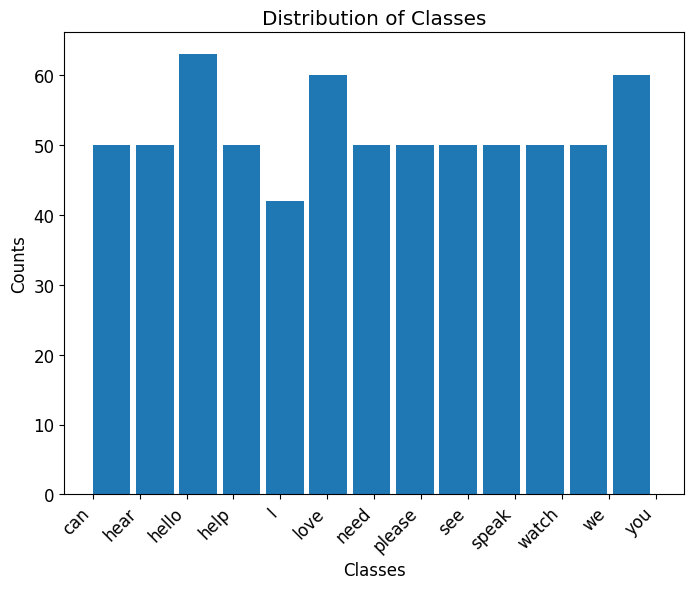

In [12]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Plot the histogram
plt.hist(labels, bins=len(classes), width=0.8)
plt.xticks(range(len(classes)), [label_dict[i] for i in range(len(classes))], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Classes')

# Display the plot
plt.show()

In [13]:
input_shape = (22, 80, 112, 3)


model = Sequential()
model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(256, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))

'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv3D(13, (3, 3, 3), activation='relu', input_shape=input_shape,  kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),
    tf.keras.layers.Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),
    tf.keras.layers.Conv3D(128, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(13, activation='softmax')
])
'''

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv3D(13, (3, 3, 3), activation='relu', input_shape=input_shape,  kernel_regularizer=regularizers.l2(0.001)),\n    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),\n    tf.keras.layers.Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),\n    tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),\n    tf.keras.layers.Conv3D(128, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(1024, activation='relu'),\n    tf.keras.layers.Dropout(0.1),\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(32, activation='relu'),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(13, activation='softmax')\n])\n"

In [14]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Convert the target labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 78, 110, 8)    656       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 39, 55, 8)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 37, 53, 32)     6944      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 18, 26, 32)    0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 2, 16, 24, 256)    221440    
                                                                 
 flatten (Flatten)           (None, 196608)            0

In [17]:
# Train the model and record the history of training
history = model.fit(X_train, y_train_onehot, epochs=21, batch_size=16, validation_data=(X_test, y_test_onehot))

Epoch 1/21
22/22 [==============================] - 142s 6s/step - loss: 78.3570 - accuracy: 0.0950 - val_loss: 2.6318 - val_accuracy: 0.1538
Epoch 2/21
22/22 [==============================] - 136s 6s/step - loss: 2.5821 - accuracy: 0.1929 - val_loss: 1.9435 - val_accuracy: 0.4260
Epoch 3/21
22/22 [==============================] - 134s 6s/step - loss: 1.8712 - accuracy: 0.4748 - val_loss: 1.3208 - val_accuracy: 0.6006
Epoch 4/21
22/22 [==============================] - 134s 6s/step - loss: 1.2669 - accuracy: 0.6142 - val_loss: 1.2859 - val_accuracy: 0.6775
Epoch 5/21
22/22 [==============================] - 134s 6s/step - loss: 0.9018 - accuracy: 0.7359 - val_loss: 0.6006 - val_accuracy: 0.8402
Epoch 6/21
22/22 [==============================] - 135s 6s/step - loss: 0.7419 - accuracy: 0.7864 - val_loss: 0.6363 - val_accuracy: 0.8432
Epoch 7/21
22/22 [==============================] - 133s 6s/step - loss: 0.4631 - accuracy: 0.8724 - val_loss: 0.4805 - val_accuracy: 0.8787
Epoch 8/21
2

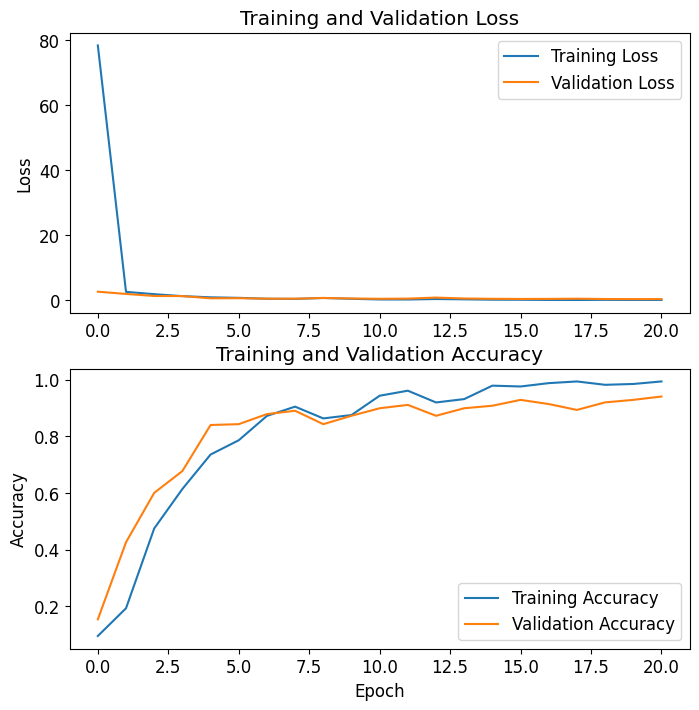

In [18]:

# Plot the training and validation loss and accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()

In [19]:
model.save('lip_read_model_v0_2_0.keras')
model.save('lip_read_model_v0_2_0.h5')

In [20]:
model.save_weights('model_weights_v0_2_0.weights.h5')

In [22]:
joblib.dump(model, 'lip_read_model_v0_2_0.joblib')

['lip_read_model_v0_2_0.joblib']

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('lip_read_model_v0_2_0.tflite', 'wb') as f:
    f.write(tflite_model)

In [23]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

11/11 [==============================] - 22s 2s/step


In [24]:
report = classification_report(y_test, y_pred, output_dict=True)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label.isdigit():
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

print(table)

+--------+-----------+--------+----------+---------+
| Class  | Precision | Recall | F1-Score | Support |
+--------+-----------+--------+----------+---------+
|  can   |    0.88   |  0.82  |   0.85   |   28.0  |
|  hear  |    0.97   |  0.97  |   0.97   |   30.0  |
| hello  |    0.97   |  0.94  |   0.95   |   32.0  |
|  help  |    0.93   |  0.96  |   0.95   |   28.0  |
|   I    |    1.0    |  1.0   |   1.0    |   19.0  |
|  love  |    0.97   |  0.94  |   0.96   |   36.0  |
|  need  |    0.96   |  0.87  |   0.92   |   31.0  |
| please |    0.89   |  0.94  |   0.92   |   18.0  |
|  see   |    0.95   |  1.0   |   0.97   |   18.0  |
| speak  |    0.78   |  0.9   |   0.84   |   20.0  |
| watch  |    0.93   |  1.0   |   0.96   |   25.0  |
|   we   |    1.0    |  0.95  |   0.98   |   21.0  |
|  you   |    0.97   |  0.97  |   0.97   |   32.0  |
+--------+-----------+--------+----------+---------+


In [25]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced accuracy: 0.9439129642758675


4/4 [==============================] - 7s 2s/step


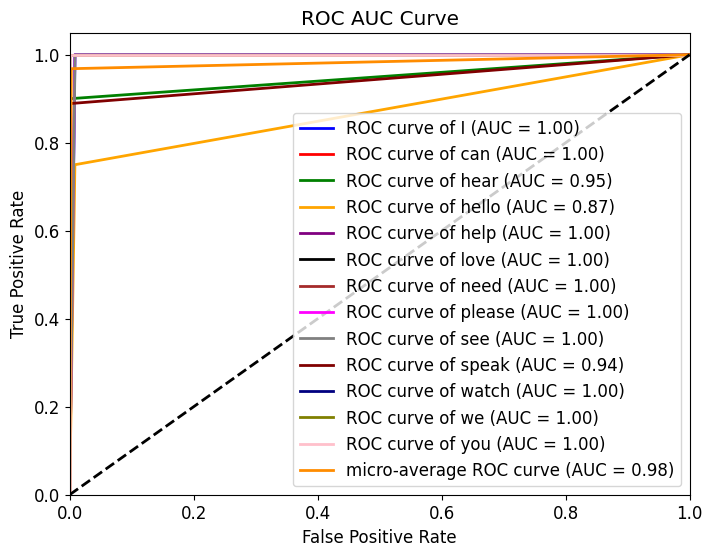

In [61]:
# Convert y_true and y_pred to one-hot encoding
n_classes = len(np.unique(y_test))
y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = model.predict(X_test)
y_pred_bin = label_binarize(np.argmax(y_pred_bin, axis=1), classes=np.arange(n_classes))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves
plt.figure(figsize=(8,6))
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'magenta', 'gray', 'maroon', 'navy', 'olive', 'pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
             label='ROC curve of {0} (AUC = {1:0.2f})'
             ''.format(label_dict[i], roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=lw,
         label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

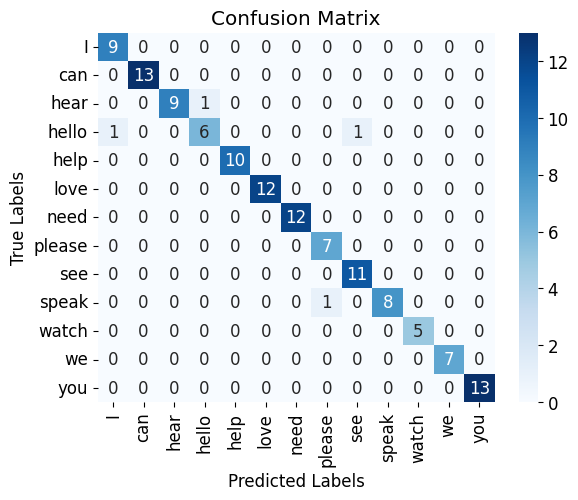

In [62]:

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Define the list of label strings in the order of their integer values
label_strings = [label_dict[i] for i in range(len(label_dict))]

# Generate the heatmap confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()